In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import adjusted_rand_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


# Aufgabe 1: Theorie Warm-up

Fragen:
1. Ist hierarchical clustering ein distanzbasiertes Clusteringverfahren?
2. Was ist der Unterschied zwischen divisiven und agglomerativen Clusterverfahren?

Musterlösung:

**'Hierarchical Clustering'** ist wie viele andere Verfahren zur Datenanalyse ein **distanzbasiertes Verfahren**. Ein Cluster besteht dabei aus 'Punkten', die zueinander eine geringere Distanz aufweisen als zu den Punkten anderer Cluster. 

Grundsätzlich werden zwei wichtige Typen dieses Verfahren unterschieden: 

**divisiven Clusterverfahren („Top-down-Verfahren“)**:  zunächst alle Objekte als zu einem Cluster gehörig betrachten und dann schrittweise die bereits gebildeten Cluster in immer kleinere Cluster aufteilen, bis jeder Cluster nur noch aus einem Objekt besteht.

**agglomerativen Clusterverfahren („Bottom-up-Verfahren“)**: zunächst bildet jedes Objekt ein eigenes Cluster dann schrittweise die bereits gebildeten Cluster zu immer größeren zusammenfassen, bis alle Objekte zu einem Cluster gehören. 

Für beide Verfahren gilt, dass einmal gebildete Cluster nicht mehr verändert werden können. Die Struktur wird entweder stets nur verfeinert („divisiv“) oder nur vergröbert („agglomerativ“), so dass eine strikte Cluster-Hierarchie entsteht. 
An der entstandenen Hierarchie kann man nicht mehr erkennen, wie sie berechnet wurde.



# Aufgabe 2: Natürliche Zahlen

Wir nutzen hierarchische Clusteranalyse mit euklidischer Distanzfunktion, um die
Menge der natürlichen Zahlen von 1 bis 512 (inklusive 1 und 512) zu clustern.

Falls mehrere Cluster dieselbe Distanz aufweisen, werden die zwei Cluster
zusammengeführt, die die kleinste Zahl beinhalten. Wenn zum Beipsiel Cluster
$A$ und $B$ dieselbe Distanz zueinander haben wie Cluster $C$ und $D$,
führen wir $A$ und $B$ zusammen falls $\operatorname{min}(A \cup B) <
\operatorname{min}(C \cup D)$. Falls $\operatorname{min}(A \cup B) =
\operatorname{min}(C \cup D)$ entscheidet die nächstkleinere Zahl.

Wir interessieren uns dafür, wie groß die beiden Cluster sind, die wir als
letztes zusammenführen (also die Cluster, die am Ursprung des Dendrogramms
anliegen). 

Fragen
- Wie groß sind die letzten beiden Cluster für single-linkage clustering?
- Wie groß sind die letzten beiden Cluster für complete-linkage clustering?



Musterlösung:
- Wie groß sind die letzten beiden Cluster für single-linkage clustering? **511 und 1**
- Wie groß sind die letzten beiden Cluster für complete-linkage clustering? **256 und 256**

# Aufgabe 3: Dendrogramme erkennen
![Dendrogramme erkennen](resources/08_data_science/dendrogramme_erkennen.png)

Musterlösung:
- 27: single
- 28: keine
- 29: keine (das ist average)
- 30: complete

*Kommentar*: Es gibt verschiedene Varianten, bei welchem Wert Cluster-Verbindungen in ein Dendrogramm eingetragen werden. In der Vorlesung wurden Beispiele gezeigt, in denen Cluster-Verbindungen bei der Hälfte der Distanz eingetragen wurden (z.B., $8.5$ für Distanz $17$ auf Slide 8 von Vorlesung 9). Oben und im folgenden verwenden wir die heute gängige Definition, bei der Cluster-Verbindungen bei der tatsächlichen Distanz eingetragen werden (im Biespiel von Slide 8 wäre das $17$ für die Distanz $17$). 

# Beispiel-Datenset: IRIS

Der IRIS-Datensatz beinhaltet 150 Beobachtungen von 4 Attributen von Schwertlilienpflanzen. Gemessen wurden jeweils Kelchblattlänge, Kelchblattbreite, Blütenblattlänge und Blütenblattbreite. Wir werden im folgenden versuchen, die beobachteten Pflanzen zu clustern. Im IRIS-Datenset ist es so, dass der Datensatz auch die tatsächliche Art der Schwertlilien beinhaltet (Setosa, Versicolour oder Virginica). Somit haben wir für diesen Datensatz "ground truth" Cluster-Assignments. 

Das Datenset besteht also aus einer 150x4 Datenmatrix (150 Beobachtungen, 4 Attribute) und einem 150x1 Vektor, der die Art angibt.



### Iris Dataset importieren

In [3]:
# Datenset laden
iris = load_iris()

# Das Datenset besteht aus 2 Teilen, die 150x4 Matrix:
iris.data[:10] # wir geben hier nur die ersten 10 Beobachtungen aus

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
# Sowie die möglichen Arten

list(iris.target_names)

['setosa', 'versicolor', 'virginica']

# Aufgabe 4: Hierarchisches clustering mit scikit-learn
Im folgenden werden Sie die [Hierarchical Clustering Implementierung von scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) nutzen, um das IRIS-Datenset mit verschiedenen Linking-Methoden zu clustern. 

Im Folgenden geben wir Ihnen ein Beispiel, wie die scikit-learn Implementierung angewandt wird. Ihre Aufgabe ist es, verschiedene Linking-Methoden anzuwenden und die sich ergebenden Clusterings zu vergleichen 

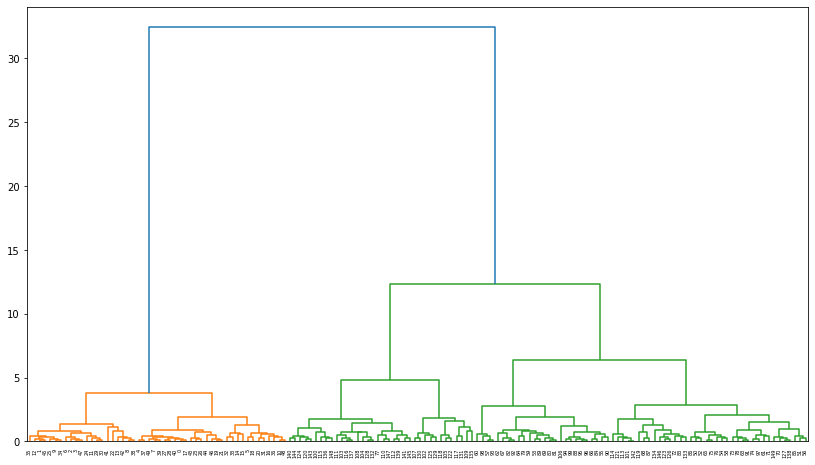

In [5]:
# Führt Hierarchisches Clustering durch und zeichnet das Dendrogramm
linkage_matrix = linkage(iris.data, "ward")
plt.figure(figsize=(14,8))
dendrogram(linkage_matrix)
plt.show()


In [ ]:
# Führt hierarchisches Clustering bis zu einer gegebenen Zahl von Clusterin durch
# und gibt Cluster-Assignments für jeden Datenpunkt zurück
assignments = AgglomerativeClustering(n_clusters = 3, linkage="ward").fit_predict(iris.data)


# Aufgabe 5: Dendrogramm interpretieren
Interpretieren Sie die entstehenden Dendrogramme
- Was stellt die x-Achse dar?
- Was stellt die y-Achse dar? 


Lösungshinweis / Musterlösung:

Die Vertikale Achse des Dendrogramms stellt den Abstand beziehungsweise die ‚Unähnlichkeit' zwischen den Clustern dar. Die horizontale Achse stellt die Objekte und Cluster dar.  
Jede Verbindung (Fusion) von zwei Clustern wird auf dem Diagramm durch die Teilung einer vertikalen Linie in zwei vertikale Linien dargestellt. Die vertikale Position der Teilung, die durch den kurzen horizontalen Balken angezeigt wird, gibt den Abstand (Unähnlichkeit) zwischen den beiden Clustern an.

# Aufgabe 6: Vergleich verschiedener Linkage Methoden

Vergleichen Sie verschiedene Verknüpfungskriterien ("linkage methods") für das IRIS-Datenset, d.h. außer "ward" auch "complete", "average", und "single". 
- Was ist der Unterschied zwischen den Methoden? 
- Welches der Kritieren kommt Ihrer Meinung nach am nähsten an die "ground truth" Cluster-Assignments heran?

Hinweis: Vergleichen Sie hierzu auch die Cluster-Assignments des hierarschischen Clusterings (`assignments`) mit den tatsächlichen Clustern (`iris.target`). Speichern Sie die Cluster-Assignments der verschiedenen Methoden (z.B., als `assignments_ward`, `assignments_complete`, ...). 


In [ ]:
# your code goes here

In [6]:
# Musterlösung: 
assignments_ward = AgglomerativeClustering(n_clusters = 3, linkage="ward").fit_predict(iris.data)
assignments_complete = AgglomerativeClustering(n_clusters = 3, linkage="complete").fit_predict(iris.data)
assignments_average = AgglomerativeClustering(n_clusters = 3, linkage="average").fit_predict(iris.data)
assignments_single = AgglomerativeClustering(n_clusters = 3, linkage="single").fit_predict(iris.data)

# Aufgabe 7: Systematischer Vergleich der Assignments
Cluster-Assignments manuell zu vergleichen ist mühsam, besonders bei großen Datensets. Wir werden nun die Metrik [`adjusted_rand_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) nutzen, um die Assignments jeder Methode zu beurteilen. Die Metrik gibt einen Cluster-Validierungsindex zurück, der zwischen -1 und 1 liegt, wobei 1 bedeutet, dass zwei Clusterings identisch sind (unabhängig davon, welches Label jedem Cluster zugeordnet ist).

Berechnen Sie den Score für jede der Methoden. Welche Methode funktioniert für dieses Datenset am besten?

In [7]:
# Beispiel:
ground_truth = [0,0,1,1,2,2]
assignments_good_clustering = [1,1,2,2,0,0]
assignments_bad_clustering = [0,1,2,0,1,2]
print("gut: " + str(adjusted_rand_score(ground_truth,assignments_good_clustering)))
print("schlecht: " + str(adjusted_rand_score(ground_truth,assignments_bad_clustering)))

gut: 1.0
schlecht: -0.25


In [ ]:
# your code goes here


In [8]:
# Musterlösung
pd.DataFrame([
    ("ward", adjusted_rand_score(iris.target, assignments_ward)),
    ("complete", adjusted_rand_score(iris.target, assignments_complete)),
    ("average", adjusted_rand_score(iris.target, assignments_average)),
    ("single", adjusted_rand_score(iris.target, assignments_single)),
])


0         1
0      ward  0.731199
1  complete  0.642251
2   average  0.759199
3    single  0.563751

# Exkurs: Clustering Algorithmen

Wir haben in diesem Modul zwei Cluster-Verfahren kennen gelernt: K-Means und Hierarchisches Clustering. Viele weitere existieren. Unten finden Sie Code, der verschiedene in scikit-learn implementierte Clustering-Verfahren auf verschiedenen Datensätzen vergleicht. [Weitere Informationen](https://scikit-learn.org/stable/modules/clustering.html#clustering)

### Konstruktion der Datensätze

In [9]:
from sklearn import cluster, datasets, mixture
np.random.seed(0)
n_samples = 1500

# Datensets 1-4
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# 5. Datenset: Anisotropich verteilte Daten
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# 6. Datenset: 'Kleckse' mit unterschiedlichen Varianzen
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

### Anwendung von verschiedenen Cluster-Verfahren

<ipython-input-10-a05c7f97ae61>:83: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
<ipython-input-10-a05c7f97ae61>:83: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.

<ipython-input-10-a05c7f97ae61>:83: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
<ipython-input-10-a05c7f97ae61>:83: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.

<ipython-input-10-a05c7f97ae61>:83: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
<ipython-input-10-a05c7f97ae61>:83: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.

<ipython-input-10-a05c7f97ae61>:83: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
<ipython-input-10-a05c7f97ae61>:83: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.

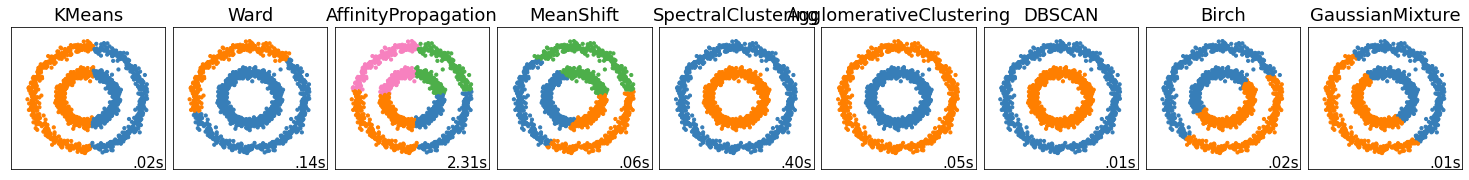

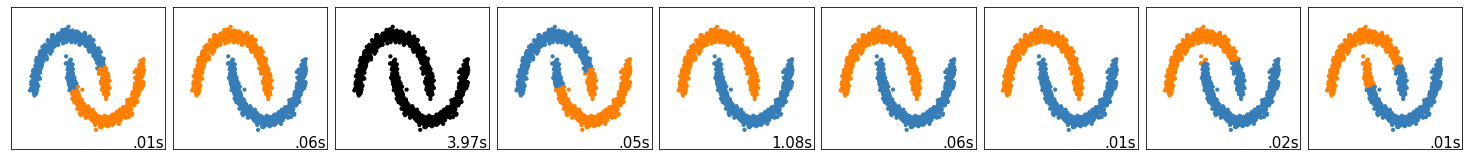

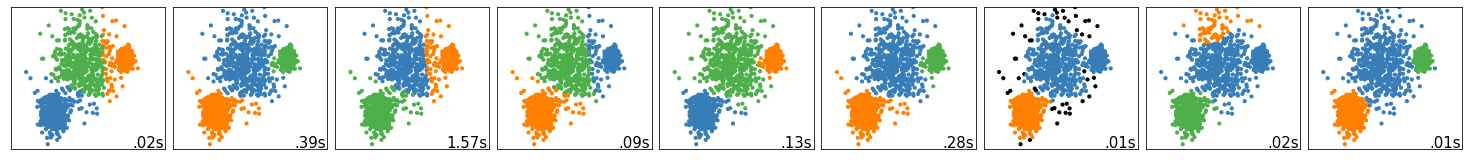

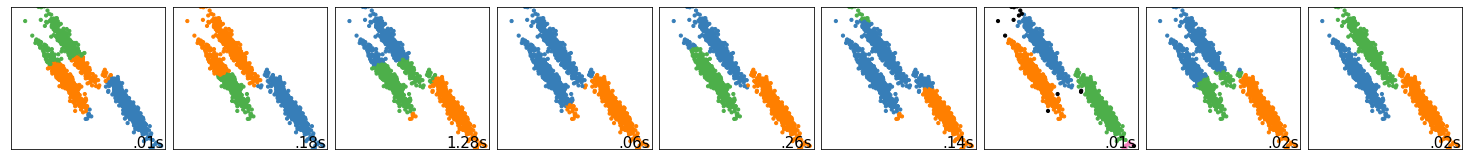

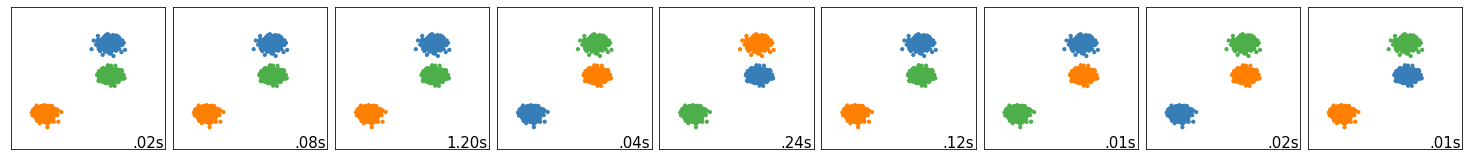

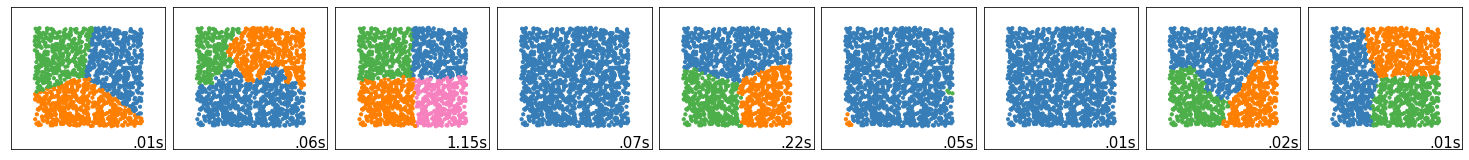

In [10]:
for i_dataset, (dataset, algo_params) in enumerate(datasets):
     # Resize
    
    plt.figure(figsize=(9 * 2 + 3, 12.5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
    
    plot_num = 1
    
     # Aktualisierung der Parameter mit datensatzspezifischen Werten
    params = default_base.copy()
    params.update(algo_params)
    X, y = dataset

     # Datensätze normalisieren, um die Parameterauswahl zu erleichtern
    X = StandardScaler().fit_transform(X)

     # Bandbreite für 'mean shift' schätzen
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

     # Konnektivitätsmatrix für strukturierte 'structured Ward'
    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
    
     # Konnektivität symmetrisch machen
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Cluster-Objekte mit Hilfe der Datensets I. - VI. erstellen
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    # optics = cluster.OPTICS(min_samples=params['min_samples'],
    #                         xi=params['xi'],
    #                         min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')
    
     # Speichern der Algorithmus Parameter/ Cluster-Objekte
    clustering_algorithms = (
        ('KMeans', two_means),
        ('Ward', ward),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        # ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )
    
     # Visualisierung der Ergebnisse
    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # Warnungen bei langen Laufzeiten
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
            
        # Farbpaletten
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        # schwarze Farbe für Ausreißer hinzufügen (falls vorhanden)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()


Fragen
1. K-Means läuft schneller als Hierarchical Clustering (siehe Laufzeiten unten rechts in den Bildern). Warum?
2. Welche Limitierungen von K-Means, z.B. gegenüber hierarchischem Clustering, können Sie erkennen?

Musterlösung:

1. Zeitkomplexität von K Means linear ist, während die von hierarchischem Clustering quadratisch ist.
2. ** Da wir in K means Clustering mit einer zufälligen Auswahl von Clustern beginnen, können die Ergebnisse, die durch mehrmaliges Ausführen des Algorithmus erzeugt werden, unterschiedlich sein. Während die Ergebnisse beim hierarchischen Clustering reproduzierbar sind.  
    ** Es hat sich gezeigt, dass K Means gut funktioniert, wenn die Form der Cluster hypersphärisch ist (wie Kreis in 2D, Kugel in 3D).  
    ** KMeans-Clustering erfordert Vorkenntnisse über K, d.h. es ist eine Anzahl von Clustern erforderlich, in die Sie Ihre Daten unterteilen möchten.
